# 12章 さまざまな教師あり学習：分類

# 12.1 ロジスティック回帰

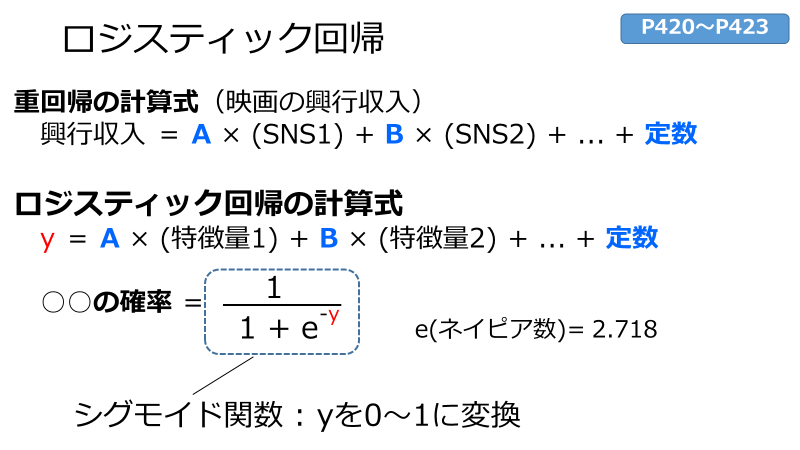

**ロジスティック回帰を使用する**  
* LogisticRegression関数をインポートする  
 **from sklearn.linear_model import LogisticRegression**

* ロジスティック回帰モデルのオブジェクトを作成する  
 **LogisticRegression(C=●, random_state=▲, multi_class='auto', solver='lbfgs')**
 * C  
  正則化項の定数(0～1)。  
  値が小さいほど、係数を小さくする働きが強まり、過学習を防ぎやすくなる。
 * random_state  
  乱数シード
 * multi_class  
  2種類の分類か、3種類以上の分類かを示す。  
 * solver  
  計算で用いるアルゴリズムを示す。

* 予測結果の確率を表示する  
 **model.predict_proba(予測データ)**  
 (決定木モデルでも同様の方法で確率を表示可能)

※重要  
ロジスティック回帰では、**予測性能を上げるために特徴量を標準化する**

 




**スケーラーに標準化で使用する情報を与え、標準化まで一気に行う**  
scaler**.fit_transform(データフレーム)**

**実装例**  
参考箇所  
コード12-5 ロジスティック回帰による学習(P426)  
コード12-6 正解率を確認する(P427)  
コード12-8 新規データで予測する(P430)  
コード12-9 確率の予測結果を確認する(P431)

In [ ]:
# 変数についての補足
# X_train ... 標準化済みの特徴量（訓練データ）
# y_train ... 正解データ（訓練データ）
# X_val ... 標準化済みの特徴量（検証データ）
# y_val ... 正解データ（検証データ）
# predict_data_sc ... 予測用のデータ（標準化済みの特徴量）

# インポート
from sklearn.linear_model import LogisticRegression

# モデル作成
model = LogisticRegression(C = 0.1,random_state=0, multi_class = 'auto', solver = 'lbfgs')

# 学習
model.fit(X_train, y_train)

# 正解率表示
print( model.score(x_train, y_train) )
print( model.score(x_val, y_val) )

# 予測
print( model.predict(predict_data_sc) )

# 確率の予測
print( model.predict_proba(predict_data_sc) )

NameError: ignored

ロジスティック回帰でも、回帰式の係数、切片を確認できる。  
分類の種類ごとの値となる。

**実装例**  
参考箇所  
コード12-7 係数を確認する(P429)

**model.classes_**  
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

**model.coef_**  
array([[-0.53209541,  0.48584036, -0.52629135, -0.83192326],  
       [ 0.09494378, -0.44720771, -0.00110969, -0.04413366],  
       [ 0.43715163, -0.03863265,  0.52740105,  0.87605692]])

**model.intercept_**  
[-0.34434407  0.48688238 -0.14253831]


# 12.2 ランダムフォレスト

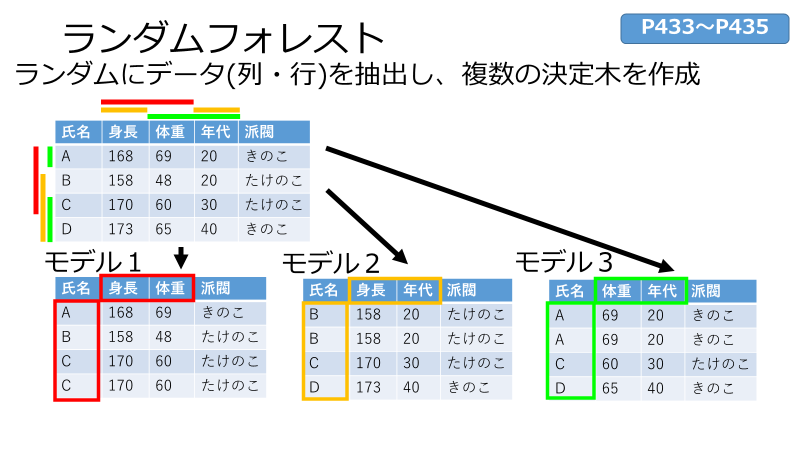

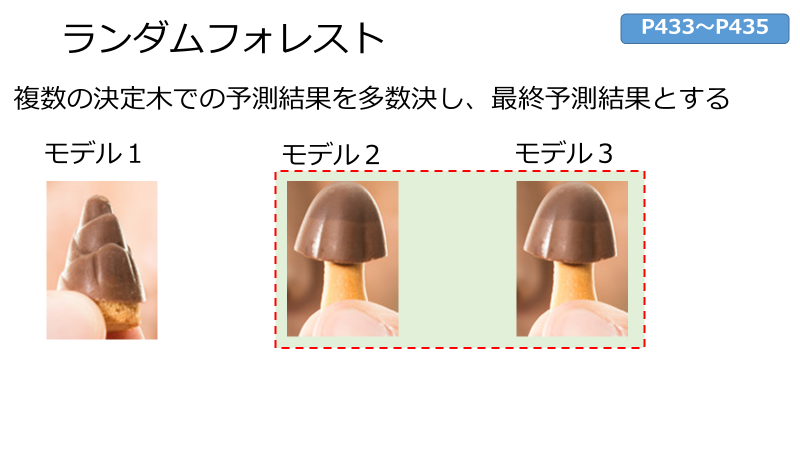

**アンサンブル学習** ... **複数の予測モデル**を作成し、1つの予測結果を出す手法  
様々なパターンのデータで学習させたモデルを組み合わせたことで、予測性能を高める  


**ランダムフォレストを使用する**  

* RandomForestClassifierをインポートする  
 **from sklearn.ensemble import RandomForestClassifier**  

* ランダムフォレストモデルのオブジェクトを作成する  
 **RandomForestClassifier(n_estimators=●, random_state=▲)**
 * n_estimators  
  作成する決定木の数
 * random_state  
  乱数シード

**実装例**  
参考箇所  
コード12-14 ランダムフォレスト(P439)  
コード12-15 モデルの学習(P440)  

In [ ]:
# 変数についての補足
# X_train ... 特徴量（訓練データ）
# y_train ... 正解データ（訓練データ）
# X_test ... 特徴量（テストデータ）
# y_test ... 正解データ（テストデータ）

# インポート
from sklearn.ensemble import RandomForestClassifier

# モデル作成
model = RandomForestClassifier(n_estimators = 200, random_state = 0)

# 学習
model.fit(X_train, y_train)

# 正解率表示
print( model.score(X_train, y_train) )
print( model.score(X_test, y_test) )

# 12.3 アダブースト

## バギング、ブースティング

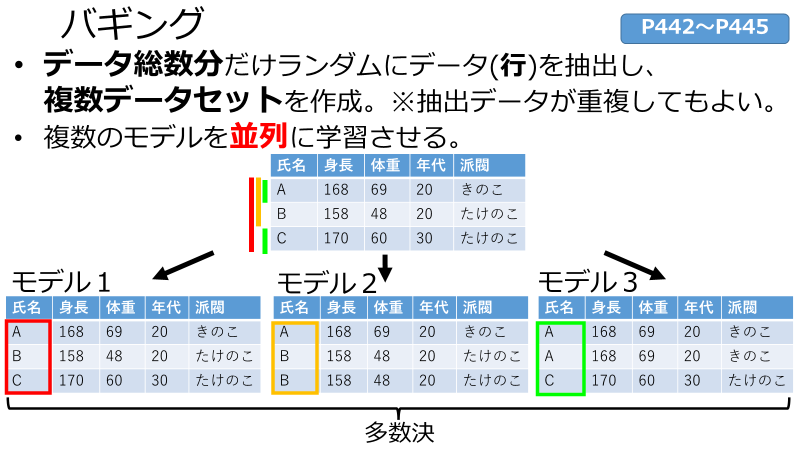

**復元抽出** ... すでに選択されたデータも重複選択OKで抽出する方法  
**ブートストラップサンプリング** ... 復元抽出で、データ総数分抽出する方法(上記の図の方法)  

※ランダムフォレストは、特徴量の**列**もランダムに選択する。

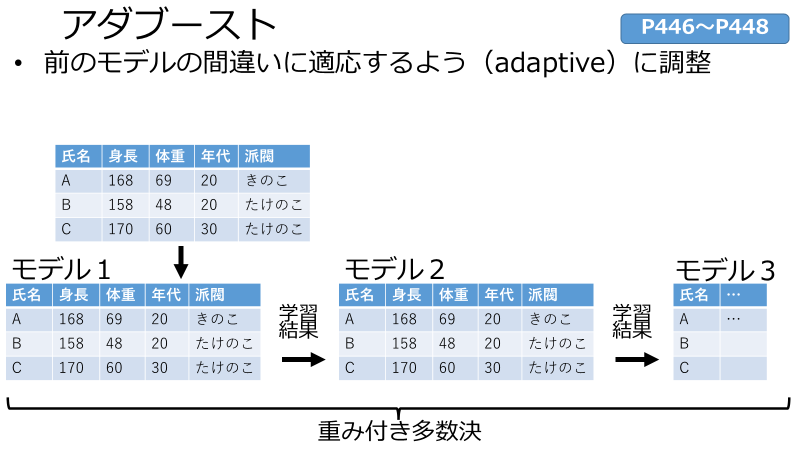

**バギングとブースティングの目的**  
予測の誤差を構成する「バリアンス」「バイアス」を少なくすること

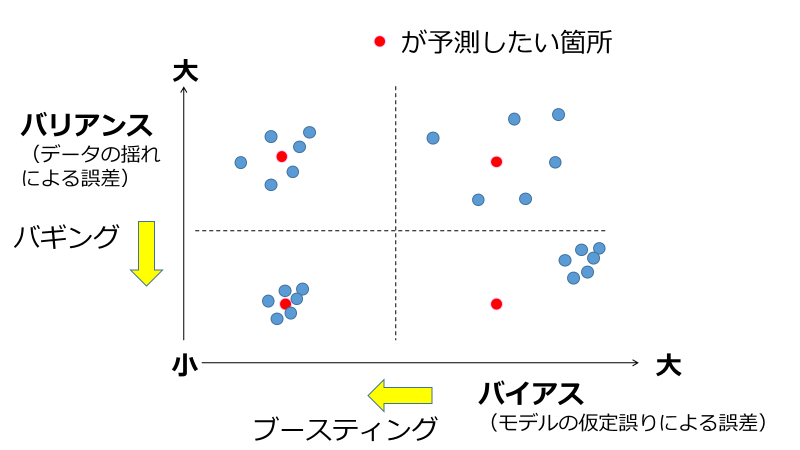

**バイアス**
* モデルの仮定が誤っているために生じる誤差
* 大きいほど、訓練データの法則を適切に捉えていない（学習不足）

**バリアンス**
* 訓練データの揺れにより生じる誤差
* 大きいほど、データのランダム性まで学習している（過学習）

**アダブーストを使用する**  


* AdaBoostClassifierをインポートする  
 **from sklearn.ensemble import AdaBoostClassifier**  
* アダブーストのオブジェクトを作成する  
 **AdaBoostClassifier(n_estimators=●, random_state=▲, base_estimator=■)**

 * n_estimators  
  作成するモデルの数
 * random_state  
  乱数シード
 * base_estimator  
  ベースにするモデル

**実装例**  
参考箇所  
コード12-18 アダブーストを実装する(P449)


In [ ]:
# 変数についての補足
# X_train ... 特徴量（訓練データ）
# y_train ... 正解データ（訓練データ）
# X_test ... 特徴量（テストデータ）
# y_test ... 正解データ（テストデータ）

# アダブースト、ベースとするモデルのライブラリのインポート
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# ベースとするモデルの生成(今回は深さ5の決定木)
base_model = DecisionTreeClassifier(random_state = 0, max_depth = 5)

# アダブーストのオブジェクトを生成(ベースとするモデルを500個使う)
model = AdaBoostClassifier(n_estimators = 500, random_state = 0, base_estimator = base_model)

# 学習
model.fit(X_train, y_train)

# 正解率表示
print( model.score(X_train, y_train) )
print( model.score(X_test, y_test) )

## ランダムフォレスト、アダブーストで回帰モデルを使う

**ランダムフォレスト(回帰)を使用する**  

* RandomForestRegressorをインポートする  
 **from sklearn.ensemble import RandomForestRegressor**  

* ランダムフォレストモデルのオブジェクトを作成する  
 **RandomForestRegressorr(n_estimators=●, random_state=▲)**
 * n_estimators  
  作成する決定木の数
 * random_state  
  乱数シード

実装例はコード12-19 ランダムフォレストで回帰のモデルを作る(P451)参照

**アダブーストで回帰を使用する**  


* AdaBoostRegressor(回帰)をインポートする  
 **from sklearn.ensemble import AdaBoostRegressor**
* アダブーストのオブジェクトを作成する  
 **AdaBoostRegressor(n_estimators=●, random_state=▲, base_estimator=■)**

 * n_estimators  
  作成するモデルの数
 * random_state  
  乱数シード
 * base_estimator  
  ベースにするモデル

実装例はコード12-20 アダブーストで回帰のモデルを作る(P451)参照